# Exploratory Data Analysis

**Run the Notebook:**
**1.** [Kaggle](https://www.kaggle.com/code/chaoscreator/complete-exploratory-data-analysis)
**2.** [Colab](https://colab.research.google.com/drive/1ZRM7xJkJJmqWKBVeVtUl43cDNsgi4mA1)

## 1. Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import warnings

# plot size
plt.rcParams["figure.figsize"] = [10, 5]

# Ignore warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


## 2. Loading the Dataset

You can get dataset from [here](https://www.kaggle.com/code/dromosys/shampoo-sales/data) 

In [2]:
df = pd.read_csv('/kaggle/input/shampoo-saled-dataset/shampoo_sales.csv')

## 3. Dataset Analysis

In [3]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [4]:
df.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [5]:
df.shape

(36, 2)

In [6]:
#check or any null values

df.isnull().sum()

Month    0
Sales    0
dtype: int64

## 4. Tackling date in the Dataset

In [7]:
# Split 'Month' column into 'Month' and 'Day'
df[['Month', 'Day']] = df['Month'].str.split('-', expand=True)

# Convert 'Month' and 'Day' columns to integer type
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)

# Display the updated DataFrame
print(df)

    Month  Sales  Day
0       1  266.0    1
1       1  145.9    2
2       1  183.1    3
3       1  119.3    4
4       1  180.3    5
5       1  168.5    6
6       1  231.8    7
7       1  224.5    8
8       1  192.8    9
9       1  122.9   10
10      1  336.5   11
11      1  185.9   12
12      2  194.3    1
13      2  149.5    2
14      2  210.1    3
15      2  273.3    4
16      2  191.4    5
17      2  287.0    6
18      2  226.0    7
19      2  303.6    8
20      2  289.9    9
21      2  421.6   10
22      2  264.5   11
23      2  342.3   12
24      3  339.7    1
25      3  440.4    2
26      3  315.9    3
27      3  439.3    4
28      3  401.3    5
29      3  437.4    6
30      3  575.5    7
31      3  407.6    8
32      3  682.0    9
33      3  475.3   10
34      3  581.3   11
35      3  646.9   12


In [8]:
df.head()

,Month,Sales,Day
0,1,266.0,1
1,1,145.9,2
2,1,183.1,3
3,1,119.3,4
4,1,180.3,5


## 5. Convert Sales to percentage format

In [9]:
# Convert 'Sales' to percentage format 
df['Sales'] = (df['Sales'] * 100).astype(int)

# Display the updated DataFrame
print(df)

    Month  Sales  Day
0       1  26600    1
1       1  14590    2
2       1  18310    3
3       1  11930    4
4       1  18030    5
5       1  16850    6
6       1  23180    7
7       1  22450    8
8       1  19280    9
9       1  12290   10
10      1  33650   11
11      1  18590   12
12      2  19430    1
13      2  14950    2
14      2  21010    3
15      2  27330    4
16      2  19140    5
17      2  28700    6
18      2  22600    7
19      2  30360    8
20      2  28989    9
21      2  42160   10
22      2  26450   11
23      2  34230   12
24      3  33970    1
25      3  44040    2
26      3  31589    3
27      3  43930    4
28      3  40130    5
29      3  43740    6
30      3  57550    7
31      3  40760    8
32      3  68200    9
33      3  47530   10
34      3  58129   11
35      3  64690   12


## 6. Calculating the required statical measures

In [10]:
# Calculate the required statistical measures

# Mean
mean_sales = df['Sales'].mean()

# Median
median_sales = df['Sales'].median()

# Mode
mode_sales = df['Sales'].mode()[0]

# Variance
variance_sales = df['Sales'].var()

# Standard Deviation
std_sales = df['Sales'].std()

# Interquartile Range (IQR)
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Dispersion (Range)
dispersion_sales = df['Sales'].max() - df['Sales'].min()

# Measure of Proximity (Skewness and Kurtosis)
skewness_sales = df['Sales'].skew()
kurtosis_sales = df['Sales'].kurt()

# Display the results
results = {
    'Mean': mean_sales,
    'Median': median_sales,
    'Mode': mode_sales,
    'Variance': variance_sales,
    'Standard Deviation': std_sales,
    'Interquartile Range': IQR,
    'Q3': Q3,
    'Dispersion (Range)': dispersion_sales,
    'Skewness': skewness_sales,
    'Kurtosis': kurtosis_sales
}

# Convert the results to a DataFrame for better readability
results_df = pd.DataFrame(results, index=['Sales'])
results_df

,Mean,Median,Mode,Variance,Standard Deviation,Interquartile Range,Q3,Dispersion (Range),Skewness,Kurtosis
Sales,31259.916667,28015.0,11930,2.218214e+08,14893.66859,21865.0,41110.0,56270,0.894545,0.116241


## 7. Calculating and Displaying Quartiles

In [12]:
Q2 = IQR #quantile 50 is also known as IQR

# Display Quartiles
print(f"Q1 (25th Percentile): {Q1}")
print(f"Q2 (Median): {Q2}")
print(f"Q3 (75th Percentile): {Q3}")

Q1 (25th Percentile): 19245.0
Q2 (Median): 21865.0
Q3 (75th Percentile): 41110.0


<Axes: ylabel='Sales'>

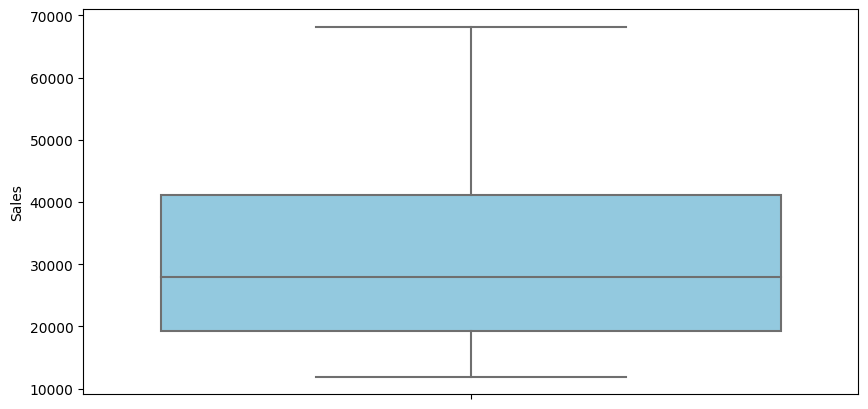

In [13]:
# Plotting Boxplot
sns.boxplot(y=df['Sales'], color='skyblue')

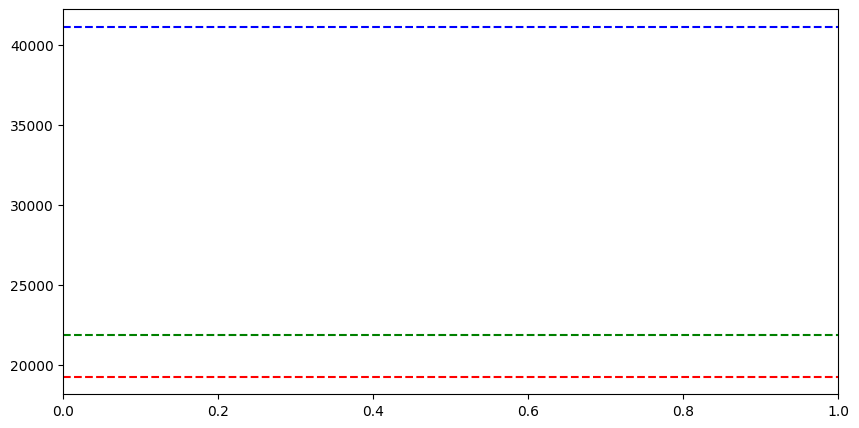

In [14]:
# Adding lines for Q1, Q2, Q3 into the plot
plt.axhline(Q1, color='r', linestyle='--', label=f'Q1: {Q1}')
plt.axhline(Q2, color='g', linestyle='--', label=f'Q2 (Median): {Q2}')
plt.axhline(Q3, color='b', linestyle='--', label=f'Q3: {Q3}')

Q1 (25th Percentile): 19245.0
Q2 (Median): 21865.0
Q3 (75th Percentile): 41110.0


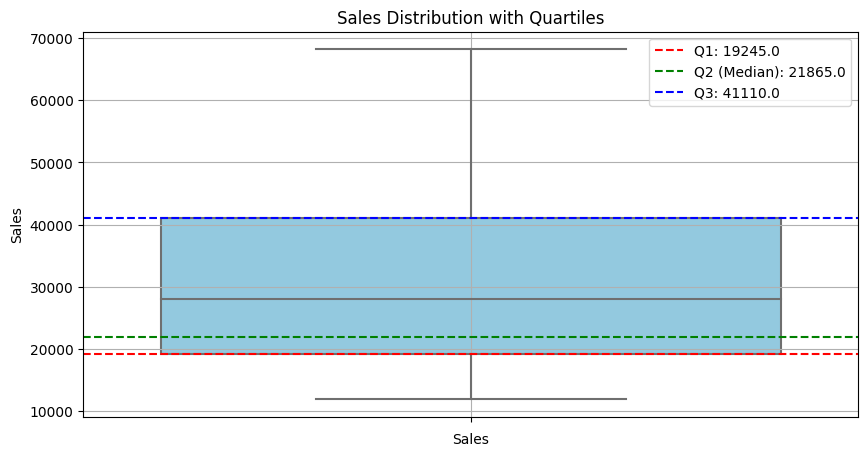

In [16]:
#plotting the final plot, combining all the above cells

print(f"Q1 (25th Percentile): {Q1}")
print(f"Q2 (Median): {Q2}")
print(f"Q3 (75th Percentile): {Q3}")

sns.boxplot(y=df['Sales'], color='skyblue')

plt.axhline(Q1, color='r', linestyle='--', label=f'Q1: {Q1}')
plt.axhline(Q2, color='g', linestyle='--', label=f'Q2 (Median): {Q2}')
plt.axhline(Q3, color='b', linestyle='--', label=f'Q3: {Q3}')

plt.title('Sales Distribution with Quartiles')
plt.xlabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


## 8. Calculating and Visualising outliers

In [20]:
# Calculating the outliers

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

# Display outliers
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [Month, Sales, Day]
Index: []


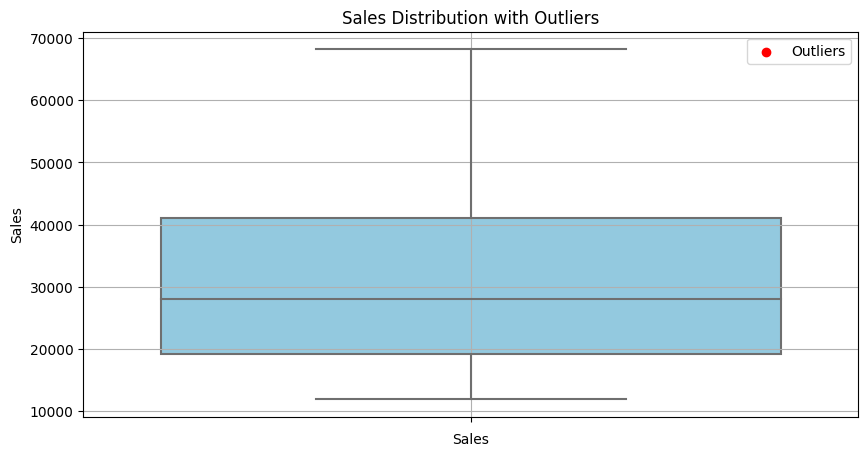

In [19]:
# Visualising the outliers 

# Plotting the Boxplot
sns.boxplot(y=df['Sales'], color='skyblue')

# Adding lines for outliers
plt.scatter(outliers.index, outliers['Sales'], color='red', label='Outliers', zorder=5)

plt.title('Sales Distribution with Outliers')
plt.xlabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# no outliers hence no changes

## 9. Finding Correlation, Cosine Similarity and Dot Product

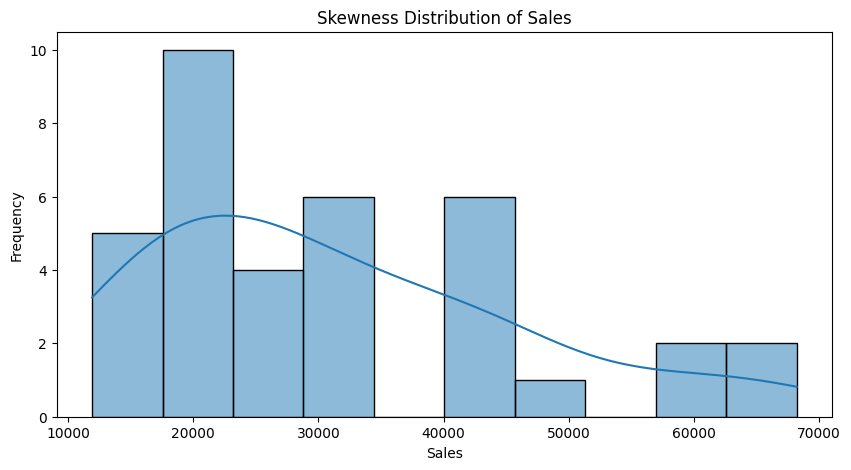

Correlation Matrix:
               Month     Sales           Day
Month  1.000000e+00  0.784201 -7.877864e-17
Sales  7.842014e-01  1.000000  3.455311e-01
Day   -7.877864e-17  0.345531  1.000000e+00

Cosine Similarity:
 [[1.         0.9486833  0.89442719 ... 0.8804711  0.86824314 0.85749293]
 [0.9486833  1.         0.98994949 ... 0.98521175 0.98058068 0.97618706]
 [0.89442719 0.98994949 1.         ... 0.99954118 0.99846035 0.99705449]
 ...
 [0.8804711  0.98521175 0.99954118 ... 1.         0.99968238 0.99892009]
 [0.86824314 0.98058068 0.99846035 ... 0.99968238 1.         0.99977373]
 [0.85749293 0.97618706 0.99705449 ... 0.99892009 0.99977373 1.        ]]

Dot Product of Sales and Days: 7945417

Month with Minimum Sales:
 Month        1
Sales    11930
Day          4
Name: 3, dtype: int64

Month with Maximum Sales:
 Month        3
Sales    68200
Day          9
Name: 32, dtype: int64

Average Sales per Month:
 Month
1    19645.833333
2    26279.083333
3    47854.833333
Name: Sales, dtype: 

In [24]:
# 1. Correlation, Cosine Similarity, and Dot Product
correlation = df.corr()

# For cosine similarity, reshape the data to calculate the pairwise cosine similarity between months and days
cosine_sim = cosine_similarity(df[['Month', 'Day']])
dot_product = np.dot(df['Sales'], df['Day'])

# 2. Find Min and Max Sales by Month
min_sales_month = df.loc[df['Sales'].idxmin()]
max_sales_month = df.loc[df['Sales'].idxmax()]

# 3. Average Sales per Month
avg_sales_per_month = df.groupby('Month')['Sales'].mean()

# 4. Max and Min Sales by Day
max_sales_per_day = df.loc[df.groupby('Month')['Sales'].idxmax()]
min_sales_per_day = df.loc[df.groupby('Month')['Sales'].idxmin()]

# 5. Skewness Distribution Plot
sns.histplot(df['Sales'], kde=True, bins=10)
plt.title('Skewness Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Show the correlation matrix
print("Correlation Matrix:\n", correlation)

# Show the cosine similarity
print("\nCosine Similarity:\n", cosine_sim)

# Show the dot product
print("\nDot Product of Sales and Days:", dot_product)

# Show the months with min and max sales
print("\nMonth with Minimum Sales:\n", min_sales_month)
print("\nMonth with Maximum Sales:\n", max_sales_month)

# Show average sales per month
print("\nAverage Sales per Month:\n", avg_sales_per_month)

# Show max and min sales by day for each month
print("\nDay with Maximum Sales in Each Month:\n", max_sales_per_day)
print("\nDay with Minimum Sales in Each Month:\n", min_sales_per_day)

              Month     Sales           Day
Month  1.000000e+00  0.784201 -7.877864e-17
Sales  7.842014e-01  1.000000  3.455311e-01
Day   -7.877864e-17  0.345531  1.000000e+00


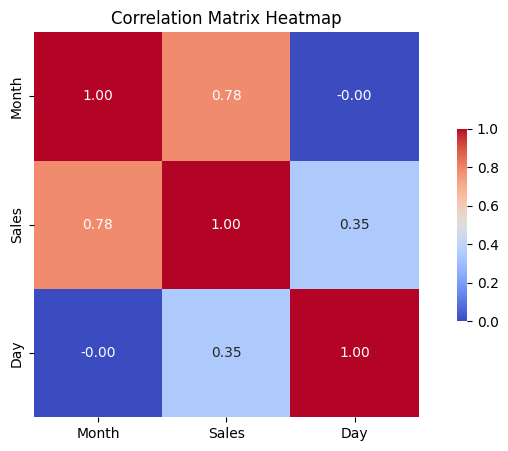

In [26]:
# Calculate the correlation matrix
correlation = df.corr()
print(correlation)
# Draw the heatmap
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

# Add titles and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

## 10. Plotting the graph of Month 1, Month 2, Month 3 and All together

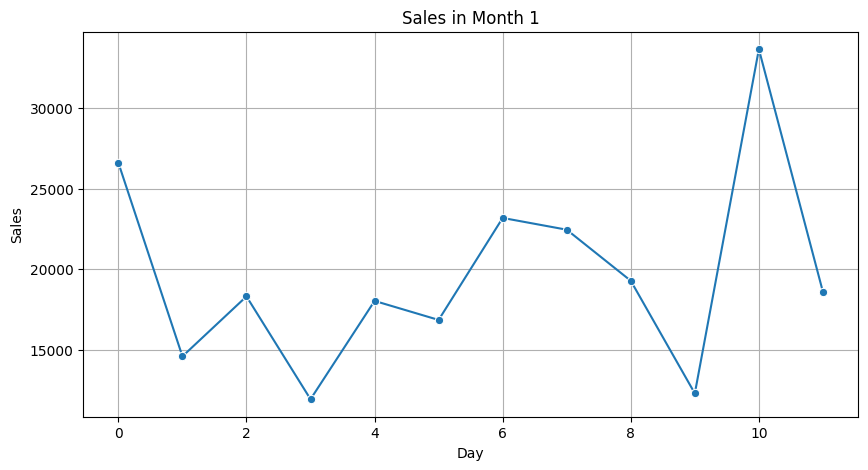

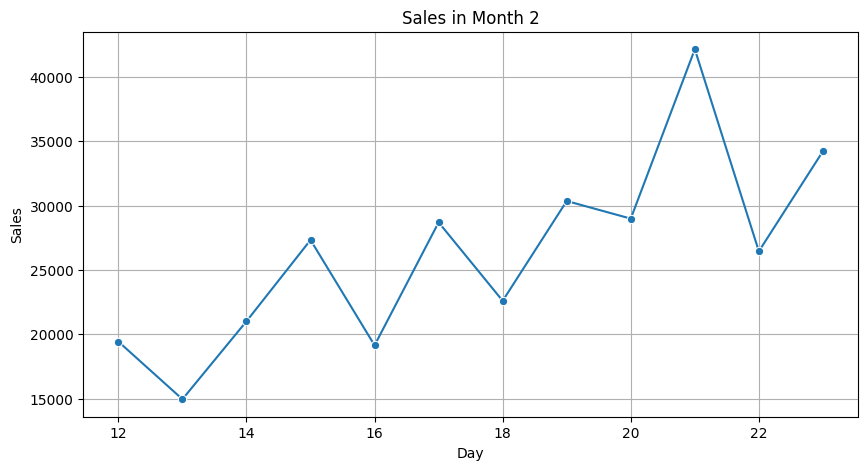

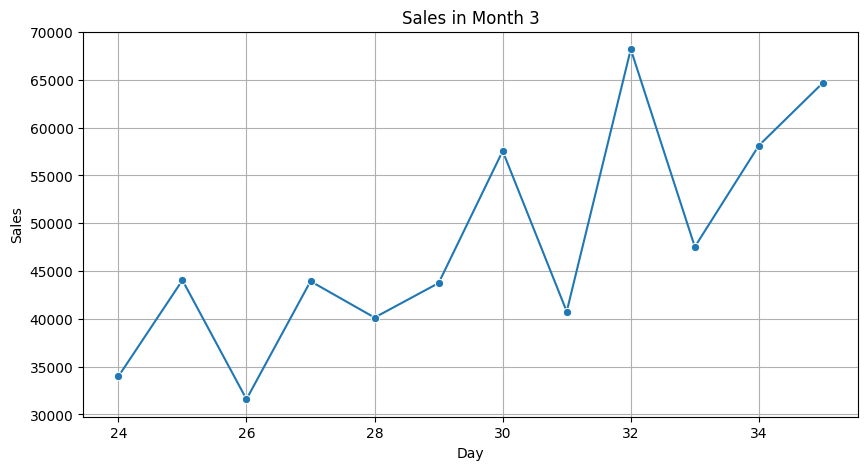

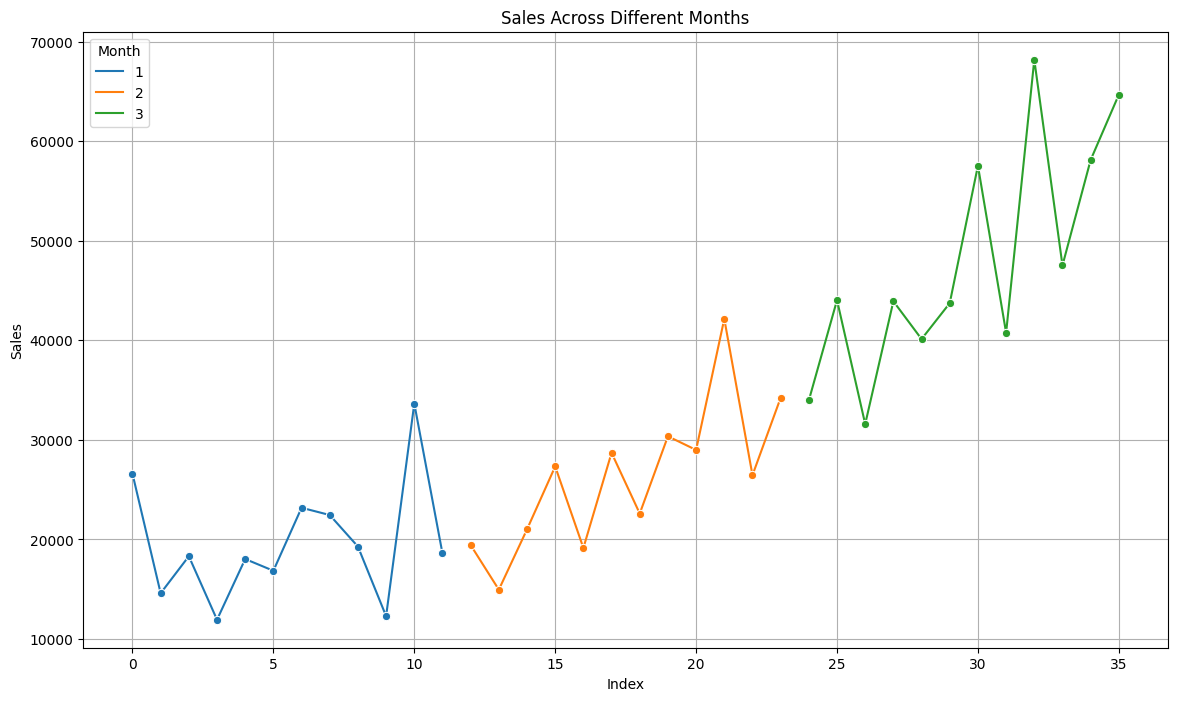

In [30]:
# Plot Sales for each month
for month in sorted(df['Month'].unique()):
    month_data = df[df['Month'] == month]
    sns.lineplot(x=month_data.index, y='Sales', data=month_data, marker='o')
    plt.title(f'Sales in Month {month}')
    plt.xlabel('Day')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.show()

# Combined plot
sns.lineplot(x=df.index, y='Sales', hue='Month', data=df, marker='o', palette='tab10')
plt.title('Sales Across Different Months')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.grid(True)
plt.legend(title='Month')
plt.show()

## 11. Calculating Data insights

In [31]:
# Calculate insights
min_sales_info = df[df['Sales'] == df['Sales'].min()]
max_sales_info = df[df['Sales'] == df['Sales'].max()]
average_sales_per_month = df.groupby('Month')['Sales'].mean()
day_max_sales = df.loc[df.groupby('Month')['Sales'].idxmax()]
day_min_sales = df.loc[df.groupby('Month')['Sales'].idxmin()]

## 12. Month with minimum Sales

(0.0, 78200.0)

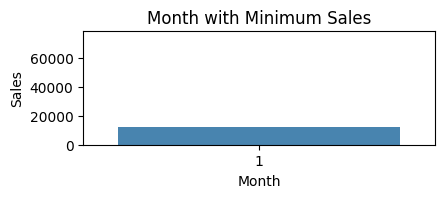

In [36]:
# 1. Plot Month with Minimum Sales
plt.subplot(3, 2, 1)
sns.barplot(x='Month', y='Sales', data=min_sales_info, palette='Blues_d')
plt.title('Month with Minimum Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.ylim(0, df['Sales'].max() + 10000)

## 13. Month with maximum Sales

(0.0, 78200.0)

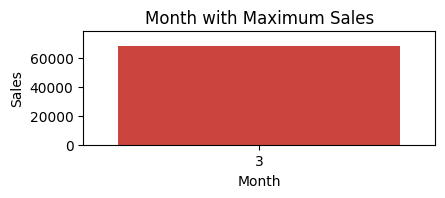

In [37]:
# 2. Plot Month with Maximum Sales
plt.subplot(3, 2, 1)
sns.barplot(x='Month', y='Sales', data=max_sales_info, palette='Reds_d')
plt.title('Month with Maximum Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.ylim(0, df['Sales'].max() + 10000)

## 14. Average Sales per Month

(0.0, 78200.0)

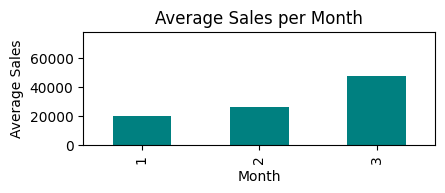

In [38]:
# 3. Plot Average Sales per Month
plt.subplot(3, 2, 1)
average_sales_per_month.plot(kind='bar', color='teal')
plt.title('Average Sales per Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.ylim(0, df['Sales'].max() + 10000)

## 15. Day with minimum Sales in each Month

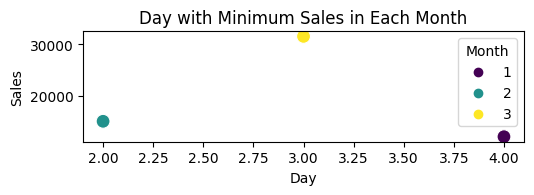

In [44]:
# Plot Day with Minimum Sales in Each Month
plt.subplot(3, 2, 1)
sns.scatterplot(x='Day', y='Sales', hue='Month', data=day_min_sales, palette='viridis', s=100)
plt.title('Day with Minimum Sales in Each Month')
plt.xlabel('Day')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

## 16. Day with maximum Sales in each Month

Text(0, 0.5, 'Sales')

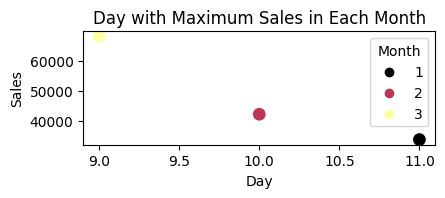

In [45]:
# Plot Day with Maximum Sales in Each Month
plt.subplot(3, 2, 1)
sns.scatterplot(x='Day', y='Sales', hue='Month', data=day_max_sales, palette='inferno', s=100)
plt.title('Day with Maximum Sales in Each Month')
plt.xlabel('Day')
plt.ylabel('Sales')

Reference: https://www.kaggle.com/code/atifaliak/complete-eda-on-shampoo-sales-dataset/notebook#3.10.-Finding-Correlation,-Cosine-Similarity-and-Dot-Product